In [1]:
import pandas as pd
import numpy as np
import bokeh as bk
import sklearn as skl
import matplotlib.pyplot

path_redc = # Reduced dataset path
path_full = # Full dataset path

columns = ['T_e','T_bb','tau_T','E','Mu','I','U']

In [2]:
DF_redc = pd.read_csv(path_redc,names=columns)
DF_full = pd.read_csv(path_full,names=columns)

In [3]:
print('Shape of full dataset',DF_full.shape)
print('Shape of reduced dataset',DF_redc.shape)
print('The difference is',DF_full.shape[0]-DF_redc.shape[0],'rows')
print('The reduced dataset is',round(DF_redc.shape[0]/DF_full.shape[0],4)*100,'% of full data')

Shape of full dataset (18874351, 7)
Shape of reduced dataset (1258291, 7)
The difference is 17616060 rows
The reduced dataset is 6.67 % of full data


In [3]:
# Check if any row is full of 0, or if there are any NaN values
size_old_full = len(DF_full)
size_old_redc = len(DF_redc)
DF_redc = DF_redc[~(DF_redc == 0).all(axis=1)]
DF_full = DF_full[~(DF_full == 0).all(axis=1)]
print(size_old_full-len(DF_full),"empty rows removed in full dataset")
print(size_old_redc-len(DF_redc),"empty rows removed in reduced dataset")

DF_full.dropna(axis=0,how='any',inplace=True)
DF_redc.dropna(axis=0,how='any',inplace=True)
print(size_old_full-len(DF_full),"empty rows removed in full dataset")
print(size_old_redc-len(DF_redc),"empty rows removed in reduced dataset")

0 empty rows removed in full dataset
0 empty rows removed in reduced dataset
0 empty rows removed in full dataset
0 empty rows removed in reduced dataset


In [5]:
print('Types of columns is full dataset')
print(DF_full.dtypes,'\n')
print('Types of columns is reduced dataset')
print(DF_redc.dtypes)

Types of columns is full dataset
T_e      float64
T_bb     float64
tau_T    float64
E        float64
Mu       float64
I        float64
U        float64
dtype: object 

Types of columns is reduced dataset
T_e      float64
T_bb     float64
tau_T    float64
E        float64
Mu       float64
I        float64
U        float64
dtype: object


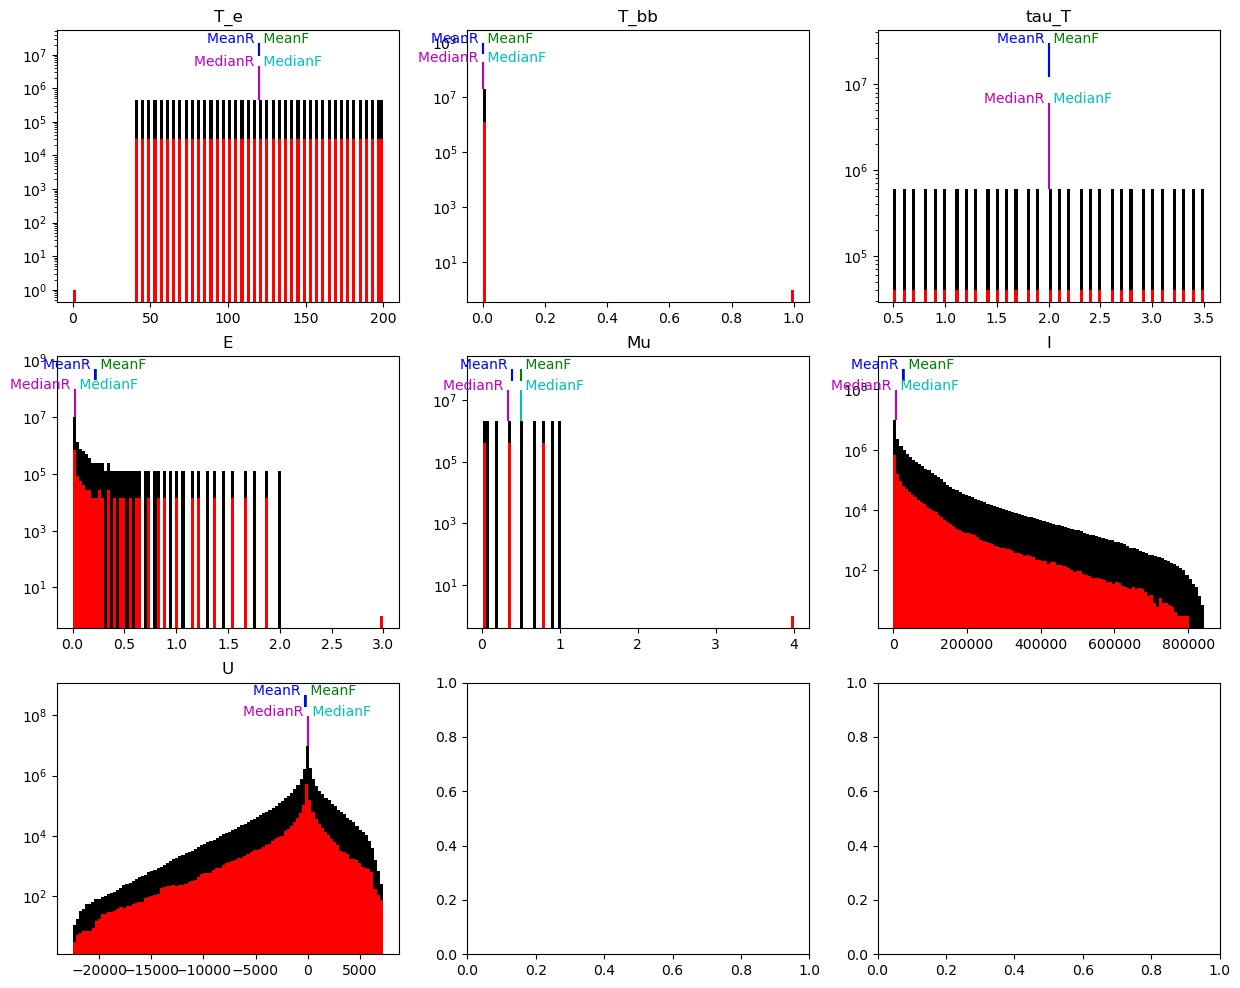

In [11]:
# I'm checking how full and reduced datasets are distributed

def make_histograms(data1,data2):

    import matplotlib.pyplot as plt
    f, ax = plt.subplots(3,3,figsize=[15,12])
    for i,c in enumerate(data1.columns):
        y, x, _ = ax[i//3][i%3].hist(data1[c],bins=100,color='k')
        _ = ax[i//3][i%3].hist(data2[c],bins=100,color='r')
        ax[i//3][i%3].set_title(c)
        ax[i//3][i%3].set_yscale('log')
        medianfull = np.median(data1[c])
        medianredc = np.median(data2[c])

        meanfull = np.mean(data1[c])
        meanredc = np.mean(data2[c])

        ax[i//3][i%3].vlines(medianfull,y.max(),y.max()*10,color='c')
        ax[i//3][i%3].vlines(medianredc,y.max(),y.max()*10,color='m')
        ax[i//3][i%3].text(medianfull,y.max()*10,' MedianF',ha='left',color='c') # "F" means full
        ax[i//3][i%3].text(medianredc,y.max()*10,'MedianR ',ha='right',color='m') # "R" means reduced

        ax[i//3][i%3].vlines(meanfull,y.max()*20,y.max()*50,color='g')
        ax[i//3][i%3].vlines(meanredc,y.max()*20,y.max()*50,color='b')
        ax[i//3][i%3].text(meanfull,y.max()*50,' MeanF',ha='left',color='g')
        ax[i//3][i%3].text(meanredc,y.max()*50,'MeanR ',ha='right',color='b')
        
make_histograms(DF_full,DF_redc)

As can be seen from above plots, reduced dataset is a good representation of full dataset, except for Mu. We can see that this feature has only few unique values, and apparently reduced dataset is covering only 4 of them. This can be a source of some inaccuracies.

Important conclusions: all features show discrete distribution. I and U labels are continous. U is the only parameter which goes to the negative values.

In [7]:
DF_full.describe()

T_e          T_bb         tau_T             E            Mu  \
count  1.887435e+07  1.887435e+07  1.887435e+07  1.887435e+07  1.887435e+07   
mean   1.200000e+02  2.000053e-03  2.000000e+00  2.218873e-01  5.000002e-01   
std    4.732865e+01  6.728820e-04  8.944272e-01  4.230709e-01  3.429982e-01   
min    0.000000e+00  1.000000e-03  5.000000e-01  1.995262e-04  1.591990e-02   
25%    8.000000e+01  1.400000e-03  1.200000e+00  1.964665e-03  1.933140e-01   
50%    1.200000e+02  2.000000e-03  2.000000e+00  2.057893e-02  5.000000e-01   
75%    1.600000e+02  2.600000e-03  2.800000e+00  2.026336e-01  8.066860e-01   
max    2.000000e+02  1.000000e+00  3.500000e+00  3.000000e+00  4.000000e+00   

                  I             U  
count  1.887435e+07  1.887435e+07  
mean   2.859684e+04 -1.826655e+02  
std    5.468856e+04  1.461782e+03  
min    8.225839e-22 -2.255601e+04  
25%    1.211813e+03 -2.057813e+02  
50%    7.552812e+03 -2.264312e+00  
75%    3.195514e+04  9.709957e+01  
max    8.429524e+05  7.277808e+03

In [8]:
DF_redc.describe()

T_e          T_bb         tau_T             E            Mu  \
count  1.258291e+06  1.258291e+06  1.258291e+06  1.258291e+06  1.258291e+06   
mean   1.199999e+02  2.000793e-03  2.000000e+00  2.127570e-01  3.868292e-01   
std    4.732876e+01  1.091583e-03  8.944272e-01  4.052745e-01  3.246954e-01   
min    0.000000e+00  1.000000e-03  5.000000e-01  1.995262e-04  1.591990e-02   
25%    8.000000e+01  1.400000e-03  1.200000e+00  1.846898e-03  1.591990e-02   
50%    1.200000e+02  2.000000e-03  2.000000e+00  2.057893e-02  3.378730e-01   
75%    1.600000e+02  2.600000e-03  2.800000e+00  1.904872e-01  8.066860e-01   
max    2.000000e+02  1.000000e+00  3.500000e+00  3.000000e+00  4.000000e+00   

                  I             U  
count  1.258291e+06  1.258291e+06  
mean   2.613431e+04 -2.994199e+02  
std    4.970042e+04  1.691320e+03  
min    4.892186e-20 -2.252708e+04  
25%    1.110355e+03 -3.500909e+02  
50%    6.937283e+03 -1.221008e+01  
75%    2.936317e+04  1.172595e+02  
max    8.009238e+05  7.204209e+03

I would like to see if I select even smaller subset, if the representation will be still OK. I'll select only 10 thousands rows, and then plot histograms again.

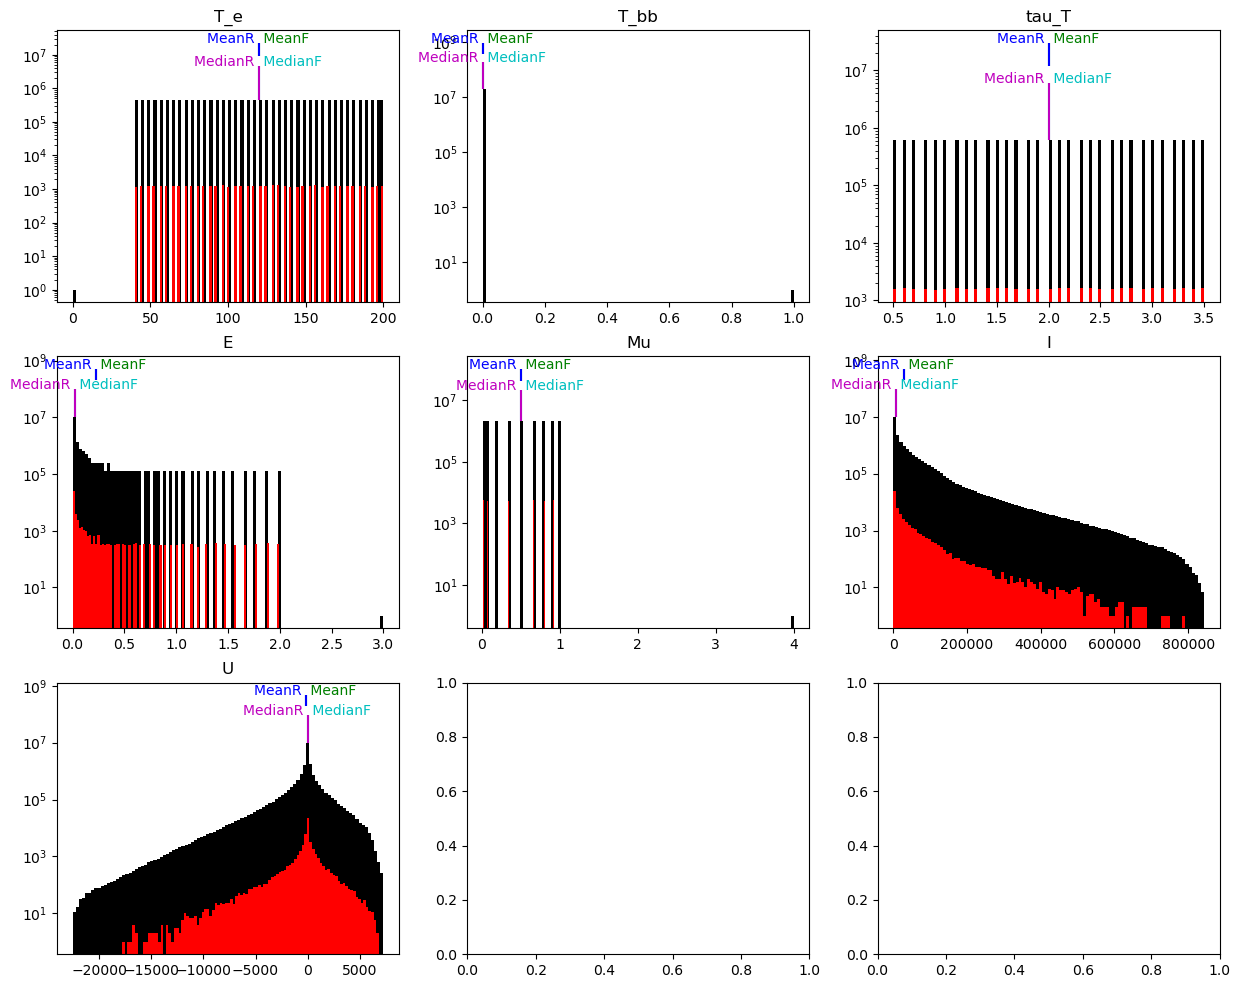

In [12]:
DF_small = DF_full.sample(50000)
make_histograms(DF_full,DF_small)

As can be seen above, 50000 rows still represent full dataset good enough.

C:\Users\togali\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


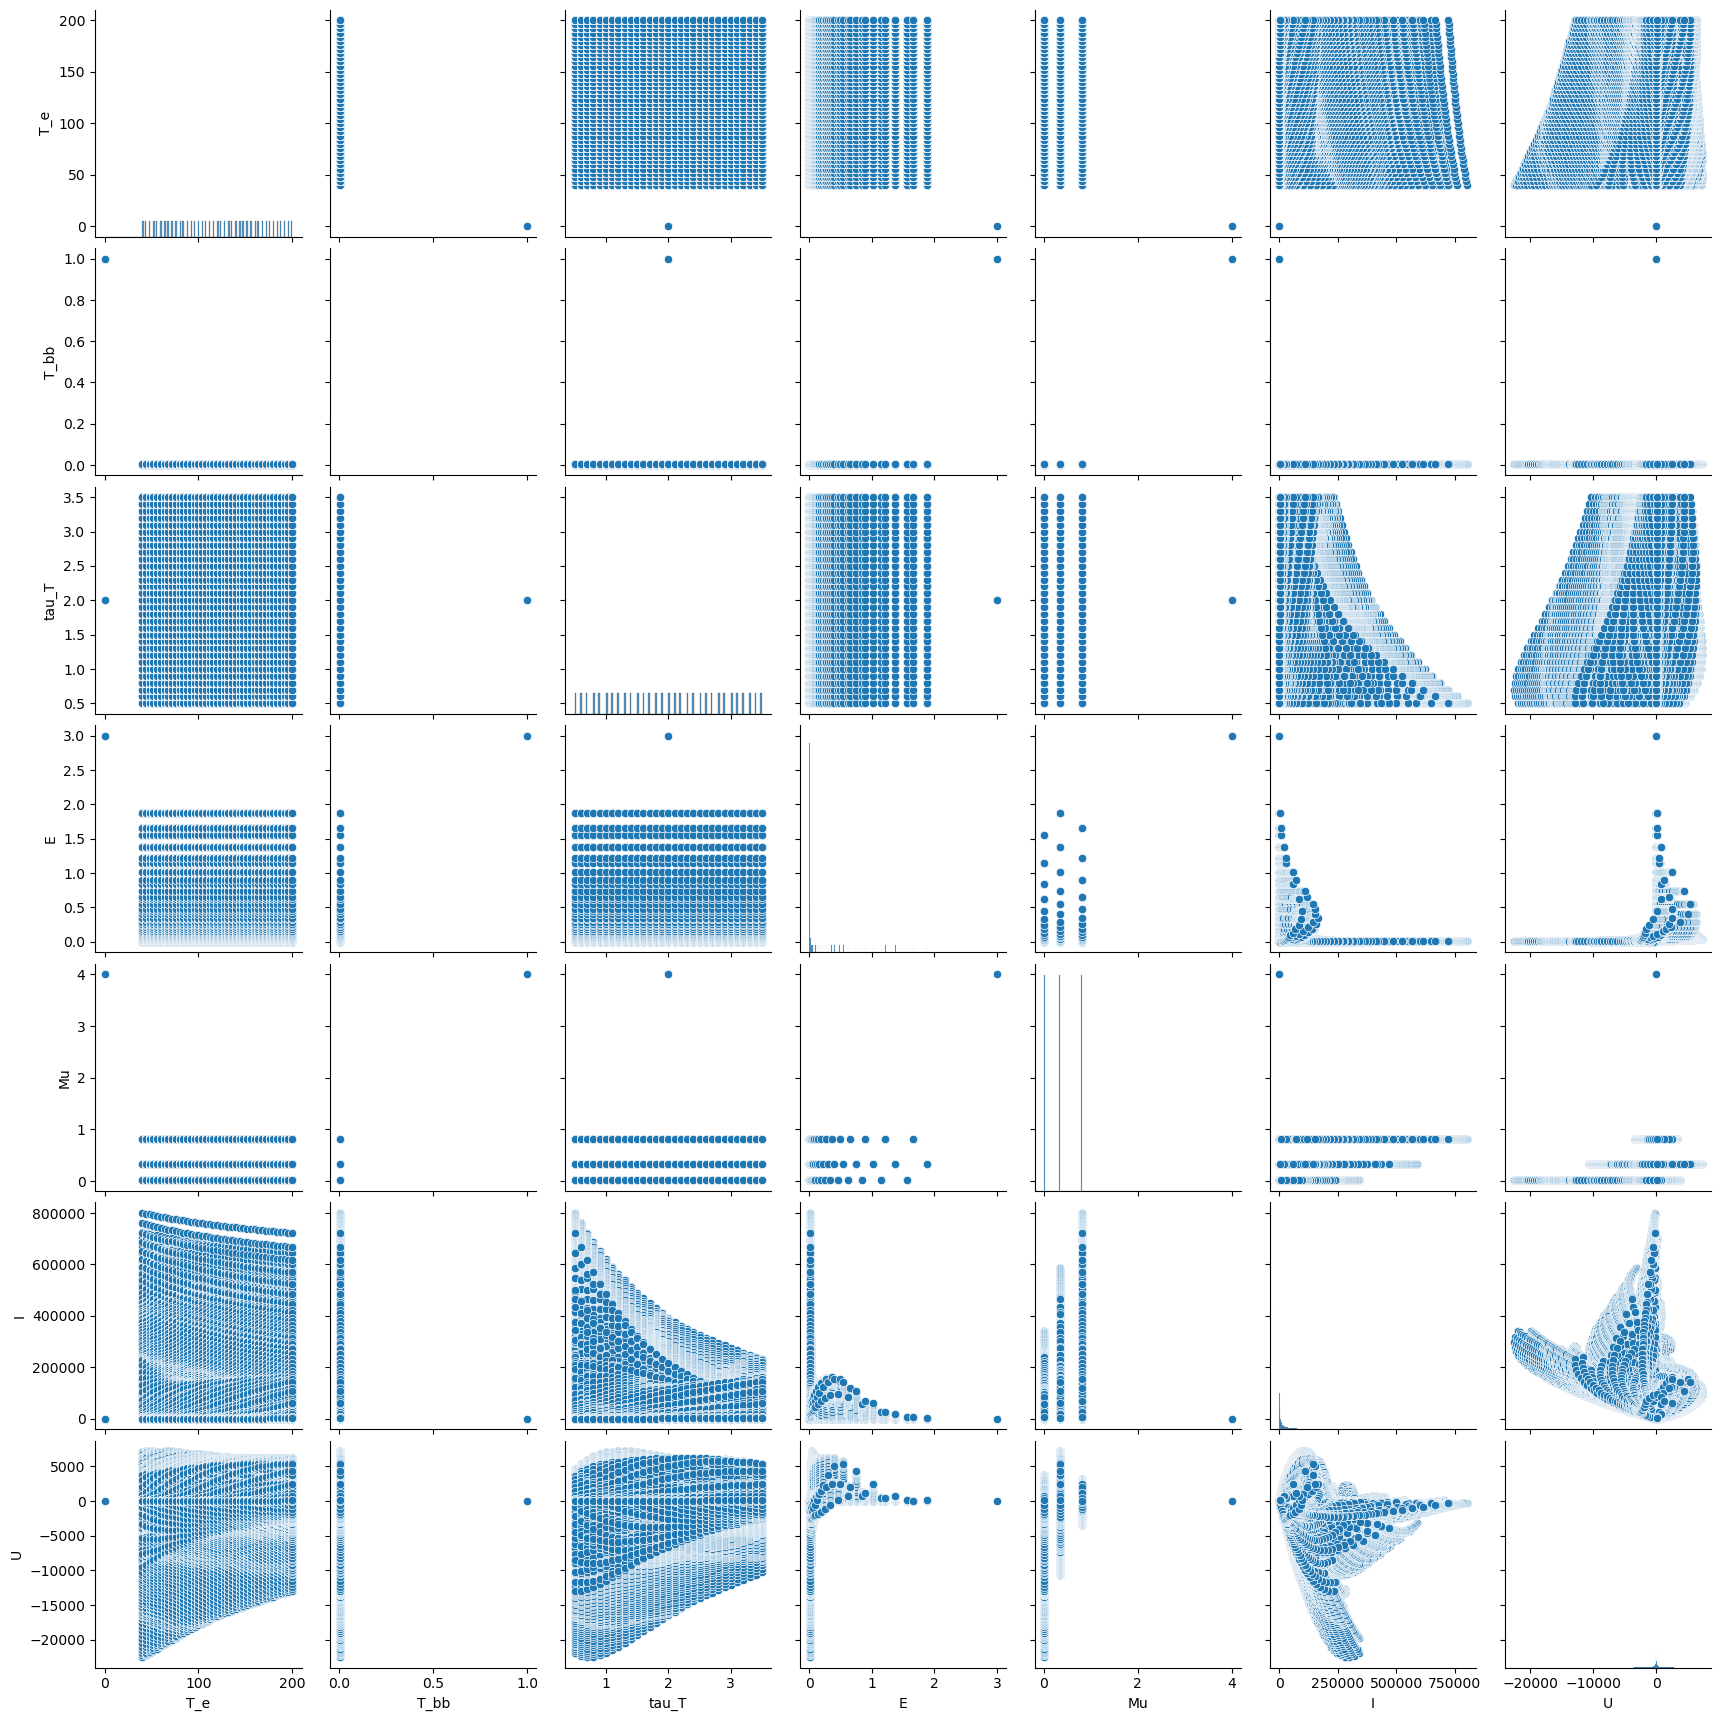

In [9]:
import seaborn as sns
# I had to use reduced data for this plot, as the full one would take too much time. As we already seen above
# reduced dataset contains almost 2 million rows.
g = sns.pairplot(DF_redc)

It can be seen that each parameter interacts with I and U in a different way. The parameter T_bb seem to have really small influence on I and Q.  It can be seen that E has intersting realtion - For E = 0 I can have broad range of values, but as E increases, I becomes closer to single value (same with U). The realation between I and U is complex.

If we try to plot the same information on the very small dataset, we can't see the same information anymore.

C:\Users\togali\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


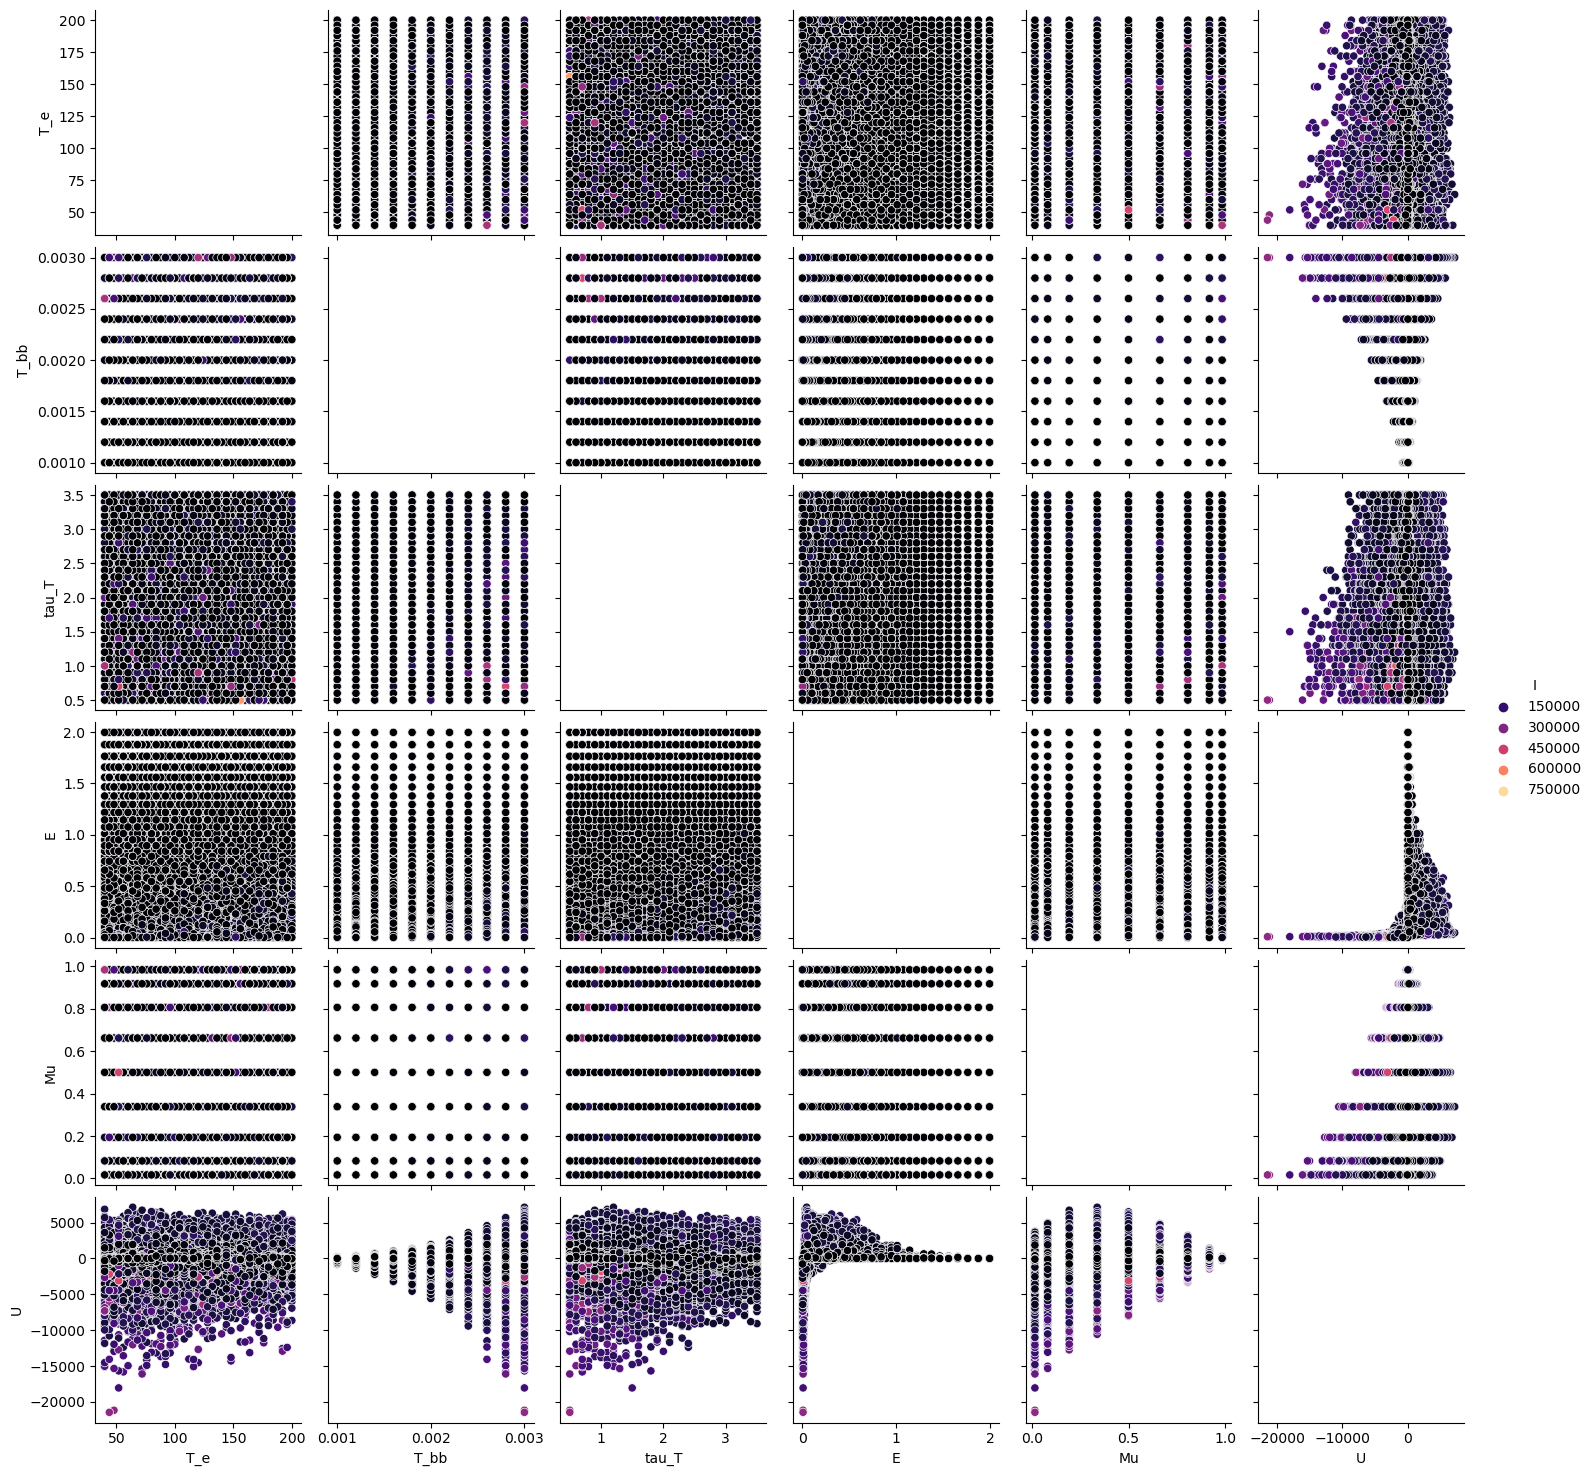

In [28]:
#In here I'm using colormap to represent target I value
g = sns.pairplot(DF_small,hue='I',palette="magma")

C:\Users\togali\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


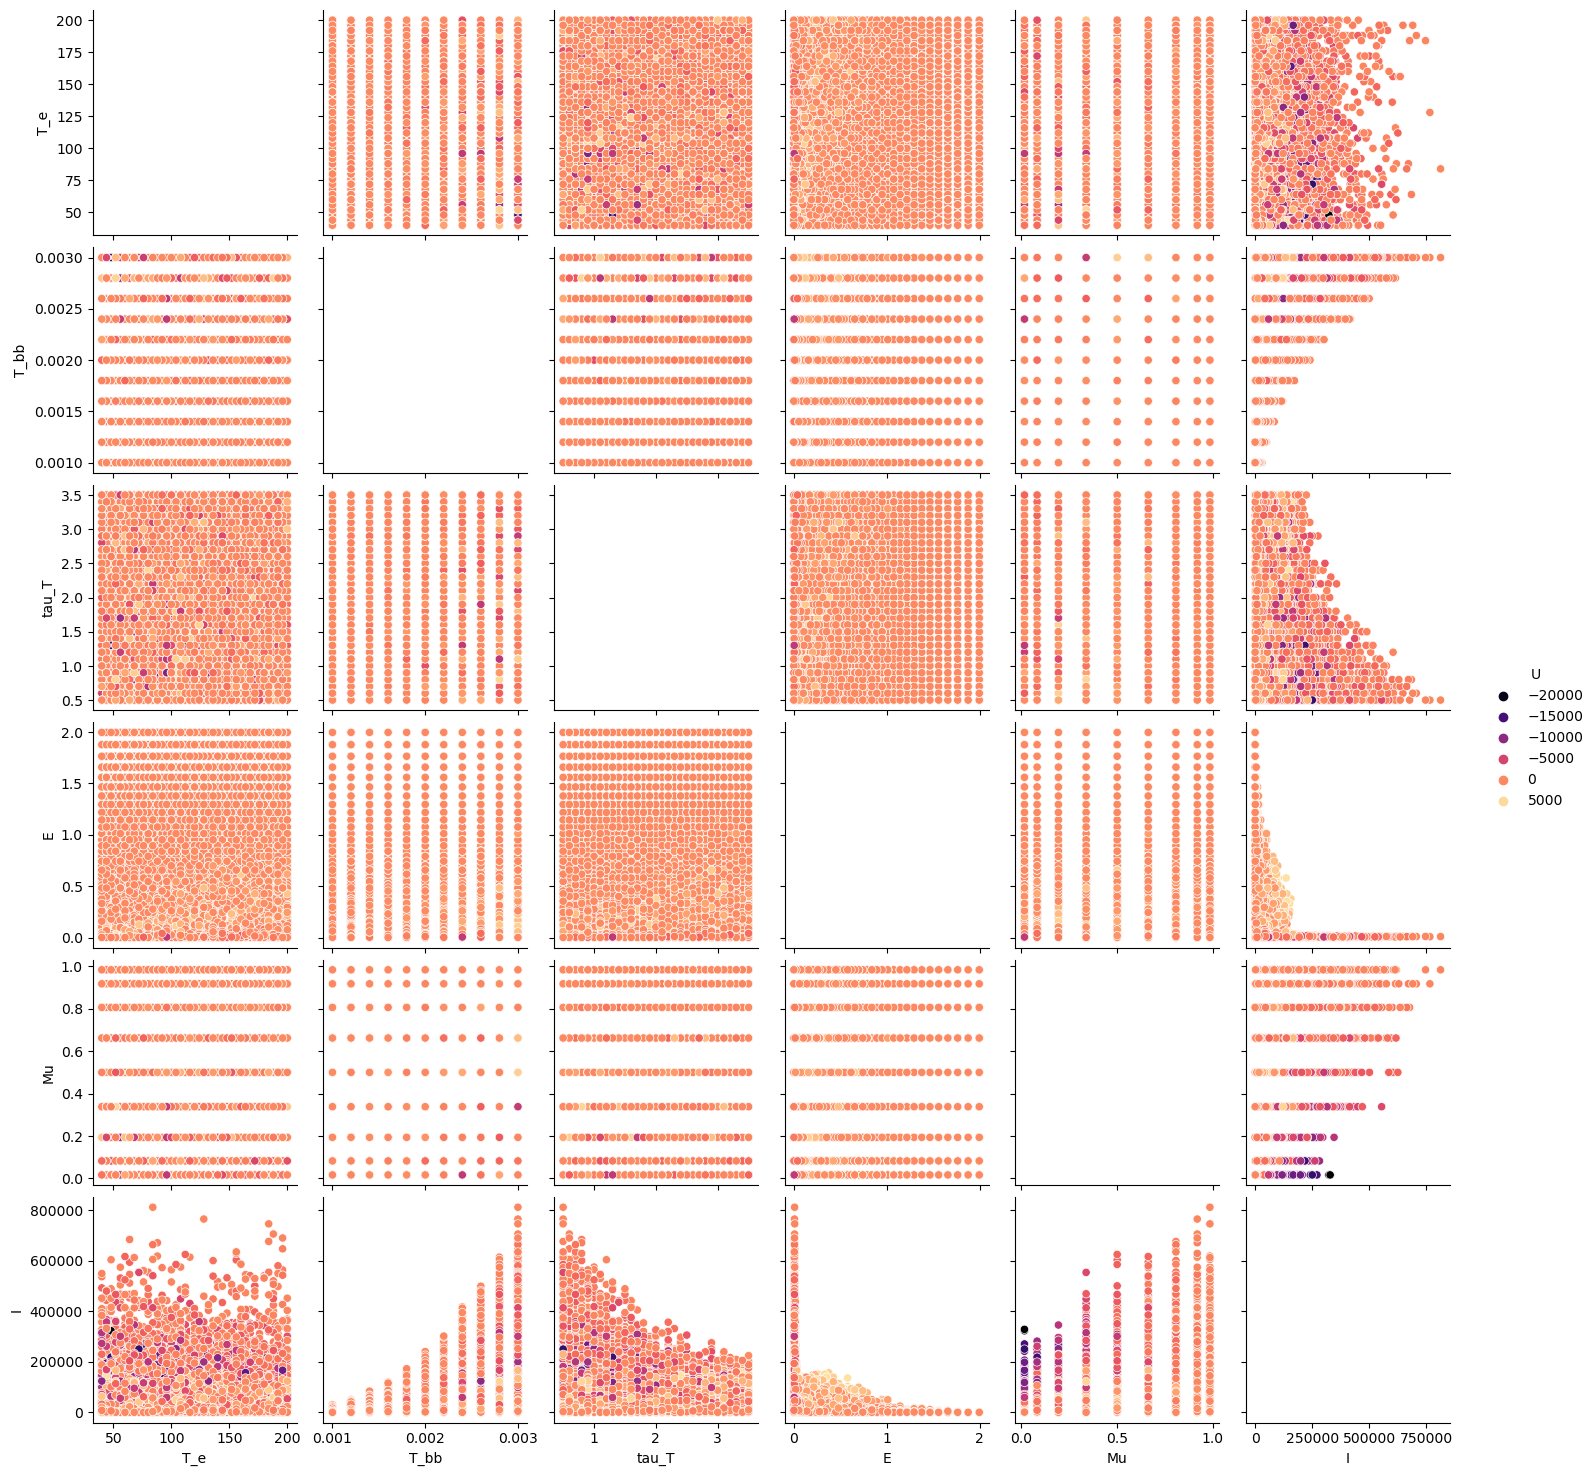

In [29]:
# U represented in same palette
g = sns.pairplot(DF_small,hue='U',palette="magma")

Probably I should use logarithminc palette to visualize U and I, as most values are really low.

In [34]:
for i in columns:
    L1 = len(DF_full[i].unique())
    L2 = len(DF_redc[i].unique())
    L3 = len(DF_small[i].unique())
    print('Parameter',i)
    print('Has',L1,'unique values in full dataset,',L2,'reduced and',L3,'in small')

Parameter T_e
Has 42 unique values in full dataset, 42 reduced and 41 in small
Parameter T_bb
Has 12 unique values in full dataset, 12 reduced and 11 in small
Parameter tau_T
Has 31 unique values in full dataset, 31 reduced and 31 in small
Parameter E
Has 151 unique values in full dataset, 91 reduced and 150 in small
Parameter Mu
Has 10 unique values in full dataset, 4 reduced and 9 in small
Parameter I
Has 18874351 unique values in full dataset, 1258291 reduced and 50000 in small
Parameter U
Has 18874351 unique values in full dataset, 1258291 reduced and 50000 in small


It can be seen how reducing dataset size limited number of unique values in features. This will very likely decrease accuracy of our ML models. For I and U labels, each datapoint is an unique value.

Comparing Full, Reduced and Small dataframes shows that reduced dataset has a flaw - it lacks a lot of unique values in E and some in Mu.

In [13]:
X = DF_small.drop(["I",'U'],axis=1)
Y = DF_small['I']

In [14]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
embd = tsne.fit_transform(X=X)

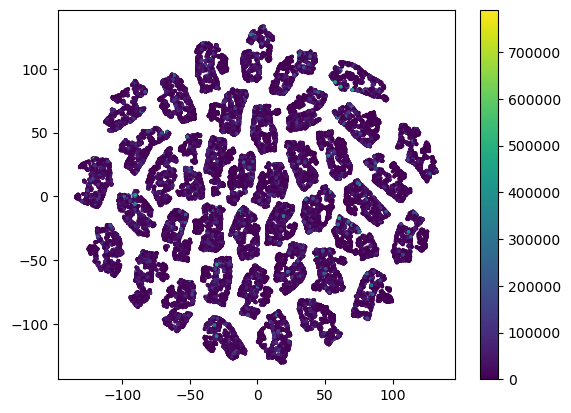

In [41]:
plt.scatter(embd[:,0],embd[:,1],cmap='viridis',c=Y,s=3)
cbar = plt.colorbar()

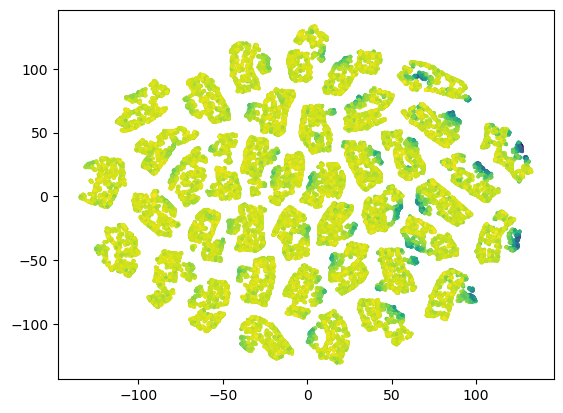

In [21]:
plt.scatter(embd[:,0],embd[:,1],cmap='viridis',c=np.log(Y),s=3)

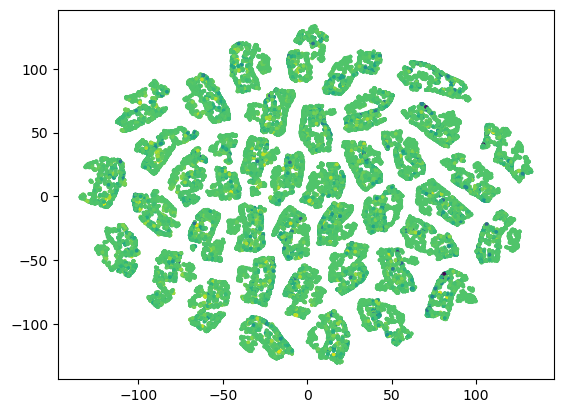

In [22]:
plt.scatter(embd[:,0],embd[:,1],cmap='viridis',c=DF_small['U'],s=3)

From the above plots we can see that our datapoints (in small dataframe) are not continous, but create separate clusters.

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
p = pca.fit_transform(X)

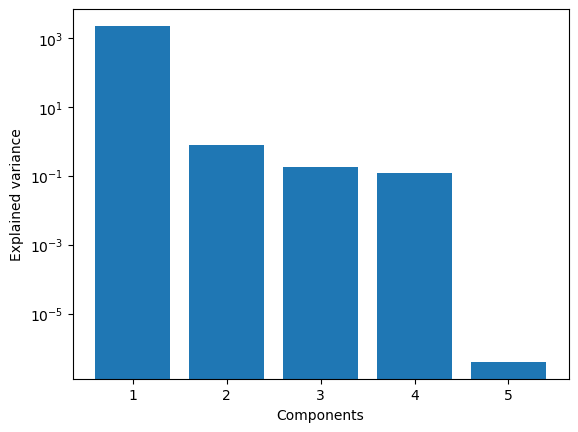

In [28]:
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.yscale('log')

In [43]:
DF_small.corr()

T_e      T_bb     tau_T         E        Mu         I         U
T_e    1.000000  0.002605 -0.007541 -0.007095  0.004387 -0.002925  0.042774
T_bb   0.002605  1.000000  0.001719  0.001010 -0.000764  0.402856 -0.094524
tau_T -0.007541  0.001719  1.000000  0.000435 -0.002072 -0.128671  0.023000
E     -0.007095  0.001010  0.000435  1.000000  0.008467 -0.206370  0.132702
Mu     0.004387 -0.000764 -0.002072  0.008467  1.000000  0.144283  0.158496
I     -0.002925  0.402856 -0.128671 -0.206370  0.144283  1.000000 -0.232140
U      0.042774 -0.094524  0.023000  0.132702  0.158496 -0.232140  1.000000

There are no strong corelations between the features. Thus using PCA won't probably improve our results.